# HSV2GRAY

Author: [Lanling Xu](https://github.com/Sherry-XLL)

Objectives:
* Have a basic understanding of RGB, HSV and Gray.
* Visualization of color channels.
* Get familiar with opencv2 and matplotlib.

## **Download Lenna picture**

> Lenna or Lena is a standard test image widely used in the field of image processing since 1973.

In [1]:
!pwd

/content


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd drive/MyDrive/

/content/drive/MyDrive


In [4]:
!ls

'Colab Notebooks'   Lenna.png


In [5]:
!gdown --id '1K8WuUOluczaIReJxFW76So2lBSOE6bdv' --output lenna.png

Downloading...
From: https://drive.google.com/uc?id=1K8WuUOluczaIReJxFW76So2lBSOE6bdv
To: /content/drive/MyDrive/lenna.png
100% 474k/474k [00:00<00:00, 63.0MB/s]


## **Import Some Packages**

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## **Font family Settings**

If you want to modify the font when drawing in Python, you can first call function `matplotlib.font_manager.fontManager.ttflist` to view the available fonts, then set `plt.rcParams["font.family"]`. 

In our code, we select `DejaVu Serif`.

In [7]:
import matplotlib
a = sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist])
for i in a:
    print(i)

DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans Display
DejaVu Sans Mono
DejaVu Sans Mono
DejaVu Sans Mono
DejaVu Sans Mono
DejaVu Serif
DejaVu Serif
DejaVu Serif
DejaVu Serif
DejaVu Serif Display
Humor Sans
Liberation Mono
Liberation Mono
Liberation Mono
Liberation Mono
Liberation Sans
Liberation Sans
Liberation Sans
Liberation Sans
Liberation Sans Narrow
Liberation Sans Narrow
Liberation Sans Narrow
Liberation Sans Narrow
Liberation Serif
Liberation Serif
Liberation Serif
Liberation Serif
STIXGeneral
STIXGeneral
STIXGeneral
STIXGeneral
STIXNonUnicode
STIXNonUnicode
STIXNonUnicode
STIXNonUnicode
STIXSizeFiveSym
STIXSizeFourSym
STIXSizeFourSym
STIXSizeOneSym
STIXSizeOneSym
STIXSizeThreeSym
STIXSizeThreeSym
STIXSizeTwoSym
STIXSizeTwoSym
cmb10
cmex10
cmmi10
cmr10
cmss10
cmsy10
cmtt10


## **Visualization of RGB color channels**

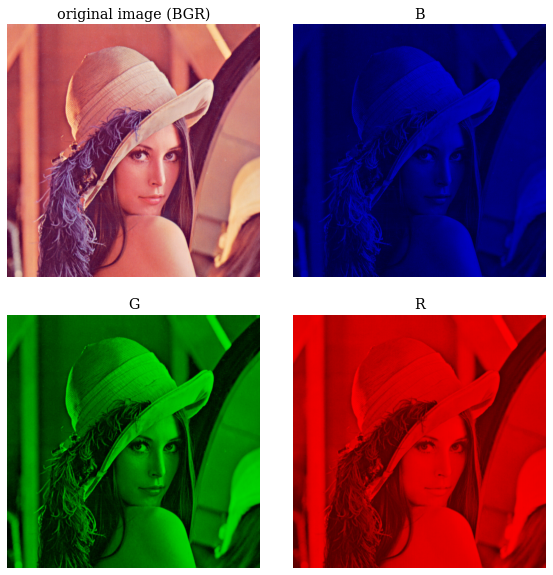

In [8]:
image = cv2.imread("lenna.png")

plt.figure(figsize=(10, 10))
plt.rcParams["font.family"] = 'DejaVu Serif'
plt.rcParams["font.size"] = 12

(b, g, r) = cv2.split(image)
z = b.copy()
for i in range(len(z)):
  for j in range(len(z[0])):
    z[i][j] = 0
bgr = cv2.merge([r, g, b])

# show BGR
plt.subplot(2, 2, 1)
plt.imshow(bgr)
plt.axis('off')
plt.title('original image (BGR)')

B = cv2.merge([z, z, b])
plt.subplot(2, 2, 2)
plt.imshow(B)
plt.axis('off')
plt.title('B')

G = cv2.merge([z, g, z])
plt.subplot(2, 2, 3)
plt.imshow(G)
plt.axis('off')
plt.title('G')

R = cv2.merge([r, z, z])
plt.subplot(2, 2, 4)
plt.imshow(R)
plt.axis('off')
plt.title('R')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.05, hspace=0.15)
# plt.show()
plt.savefig("bgr.png")

## **Convert RGB to Grayscale image**

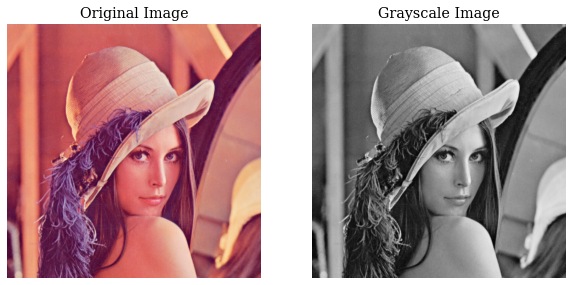

In [10]:
# show BGR
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(bgr)
plt.axis('off')
plt.title('Original Image')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.subplot(1, 2, 2)
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.title('Grayscale Image')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
# plt.show()
plt.savefig("grayscale.png")

## **Visualization of hue, saturation and value**

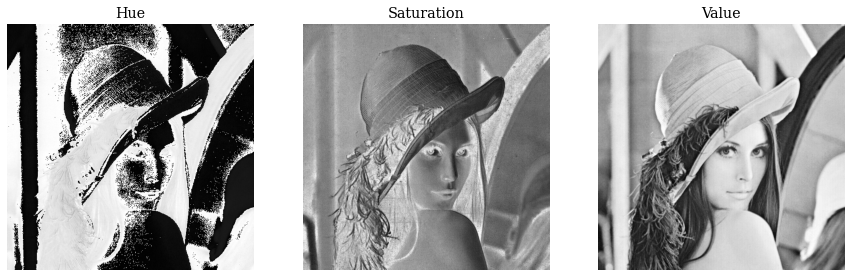

In [11]:
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
(h, s, v) = cv2.split(hsv)

plt.figure(figsize=(15, 6))
plt.rcParams["font.family"] = 'DejaVu Serif'
plt.rcParams["font.size"] = 12

plt.subplot(1, 3, 1)
plt.imshow(h, cmap='gray')
plt.axis('off')
plt.title('Hue')

plt.subplot(1, 3, 2)
plt.imshow(s, cmap='gray')
plt.axis('off')
plt.title('Saturation')

plt.subplot(1, 3, 3)
plt.imshow(v, cmap='gray')
plt.axis('off')
plt.title('Value')
plt.savefig("hsv.png")

## **Common error visualization of HSV**

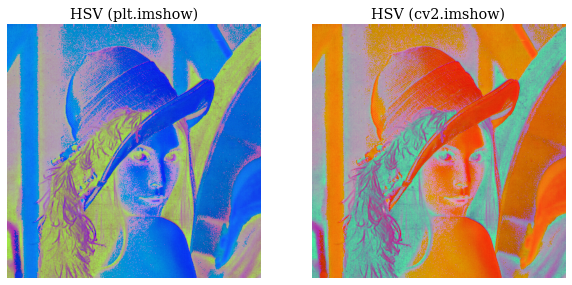

In [12]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(hsv)
plt.axis('off')
plt.title('HSV (plt.imshow)')

hsv2 = cv2.merge([v, s, h])

plt.subplot(1, 2, 2)
plt.imshow(hsv2)
plt.axis('off')
plt.title('HSV (cv2.imshow)')
plt.savefig("hsvshow.png")

## **Comparison between Grayscale image and value of HSV**

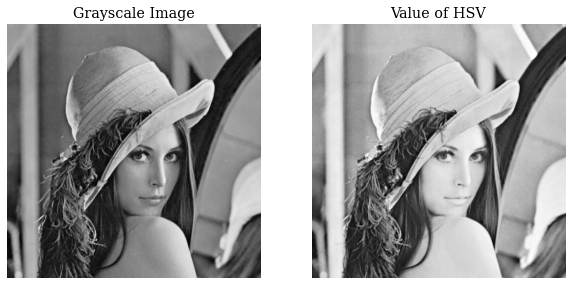

In [13]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.title('Grayscale Image')

plt.subplot(1, 2, 2)
plt.imshow(v, cmap='gray')
plt.axis('off')
plt.title('Value of HSV')
plt.savefig("graycmp.png")